In [2]:
!pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Dataset Shape: (7613, 5)

Missing Values:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


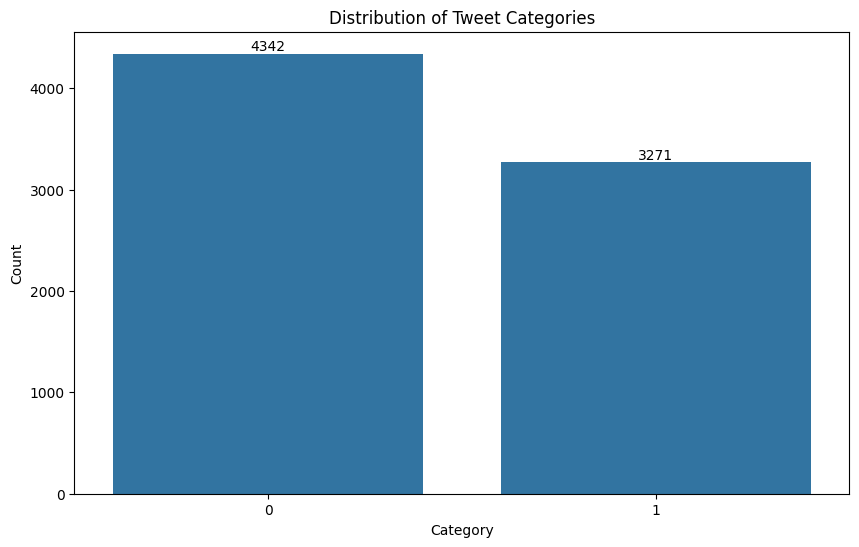

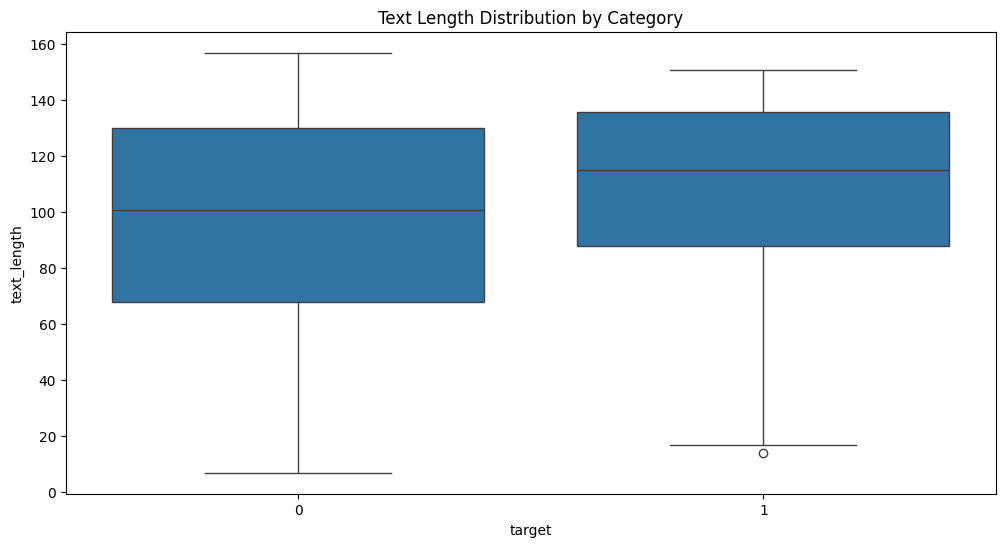

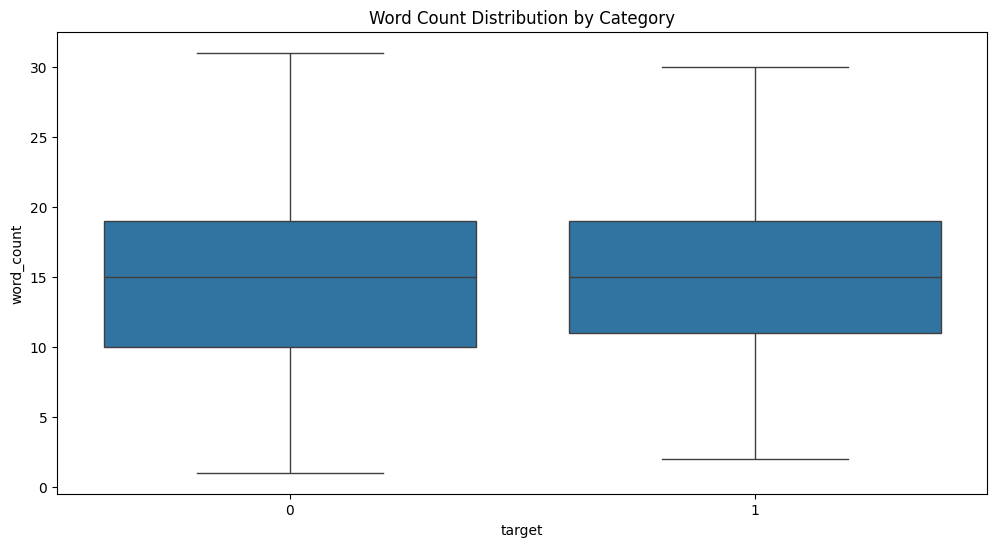


Text Statistics:
--------------------------------------------------
Average text length: 101.03743596479706
Average word count: 14.903585971364771
Max text length: 157
Min text length: 7


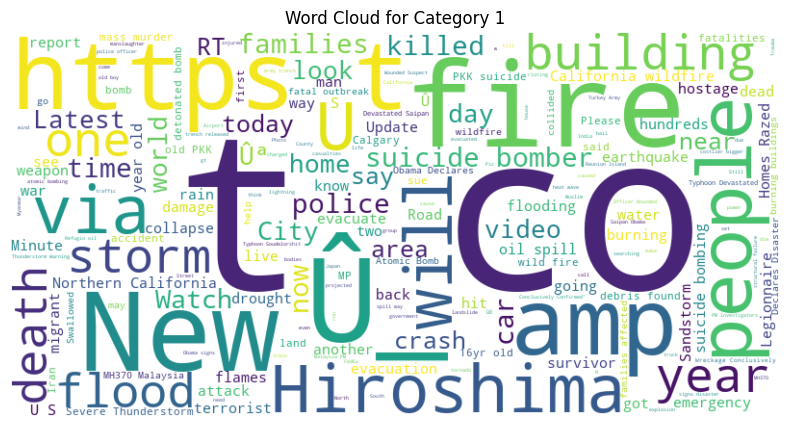

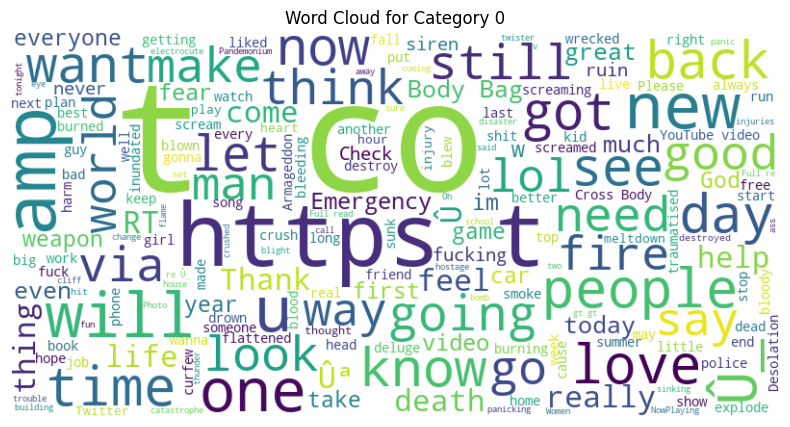


Most Common Words:
--------------------------------------------------

Category 1:
t: 2659
co: 2528
http: 2382
the: 1364
in: 1164
a: 935
of: 928
to: 757
and: 506
on: 420

Category 0:
t: 2540
co: 2212
http: 1927
the: 1913
i: 1391
a: 1265
to: 1192
and: 920
of: 902
in: 822

Statistics by Category:
--------------------------------------------------
         count        mean        std   min   25%    50%    75%    max
target                                                                
0       4342.0   95.706817  35.885924   7.0  68.0  101.0  130.0  157.0
1       3271.0  108.113421  29.309854  14.0  88.0  115.0  136.0  151.0

Correlation between text length and target: 0.1818168425446076


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Basic dataset information
tweet = pd.read_csv('train.csv')
print("Dataset Info:")
print("-" * 50)
print(tweet.info())
print("\nDataset Shape:", tweet.shape)
print("\nMissing Values:")
print(tweet.isnull().sum())

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=tweet.target.value_counts().index, 
            y=tweet.target.value_counts().values)
plt.title('Distribution of Tweet Categories')
plt.xlabel('Category')
plt.ylabel('Count')
for i, v in enumerate(tweet.target.value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# Text length analysis
tweet['text_length'] = tweet['text'].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='text_length', data=tweet)
plt.title('Text Length Distribution by Category')
plt.show()

# Word count analysis
tweet['word_count'] = tweet['text'].str.split().str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='word_count', data=tweet)
plt.title('Word Count Distribution by Category')
plt.show()

# Basic text statistics
print("\nText Statistics:")
print("-" * 50)
print("Average text length:", tweet['text_length'].mean())
print("Average word count:", tweet['word_count'].mean())
print("Max text length:", tweet['text_length'].max())
print("Min text length:", tweet['text_length'].min())

# Word clouds for each category
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for each category
for category in tweet.target.unique():
    text = ' '.join(tweet[tweet.target == category]['text'])
    create_wordcloud(text, f'Word Cloud for Category {category}')

# Most common words
from collections import Counter
import re

def get_common_words(texts, n=10):
    words = ' '.join(texts).lower()
    words = re.findall(r'\w+', words)
    return Counter(words).most_common(n)

print("\nMost Common Words:")
print("-" * 50)
for category in tweet.target.unique():
    print(f"\nCategory {category}:")
    common_words = get_common_words(tweet[tweet.target == category]['text'])
    for word, count in common_words:
        print(f"{word}: {count}")

# Basic statistics by category
print("\nStatistics by Category:")
print("-" * 50)
print(tweet.groupby('target')['text_length'].describe())

# Correlation between text length and target
correlation = tweet['text_length'].corr(tweet['target'])
print("\nCorrelation between text length and target:", correlation)